In [124]:
import os, sys, glob
import numpy as np
import scipy.signal as sigpro
import scipy.linalg as scpla

from tqdm.notebook import tqdm
import math
import string
import heapq
from collections import defaultdict

%matplotlib notebook
import matplotlib.pyplot as plt

In [143]:


hpq = []

for ii in range(5):
    ch = int(np.random.rand()*5)
    hh = (ch, {'this':0,'is':ii})
    print(hh)
    heapq.heappush(hpq, hh)
for h in hpq:
    print(h)
print()
h0 = heapq.heappop(hpq)
print(h0)
print('----')
for h in hpq:
    print(h)

(4, {'this': 0, 'is': 0})
(4, {'this': 0, 'is': 1})


TypeError: '<' not supported between instances of 'dict' and 'dict'

# Problem 15

(100, 100)
60941
[(0, 0, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 198, 'done': False}), (60941, 1, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 198, 'done': False})]
path complete 741 


<IPython.core.display.Javascript object>


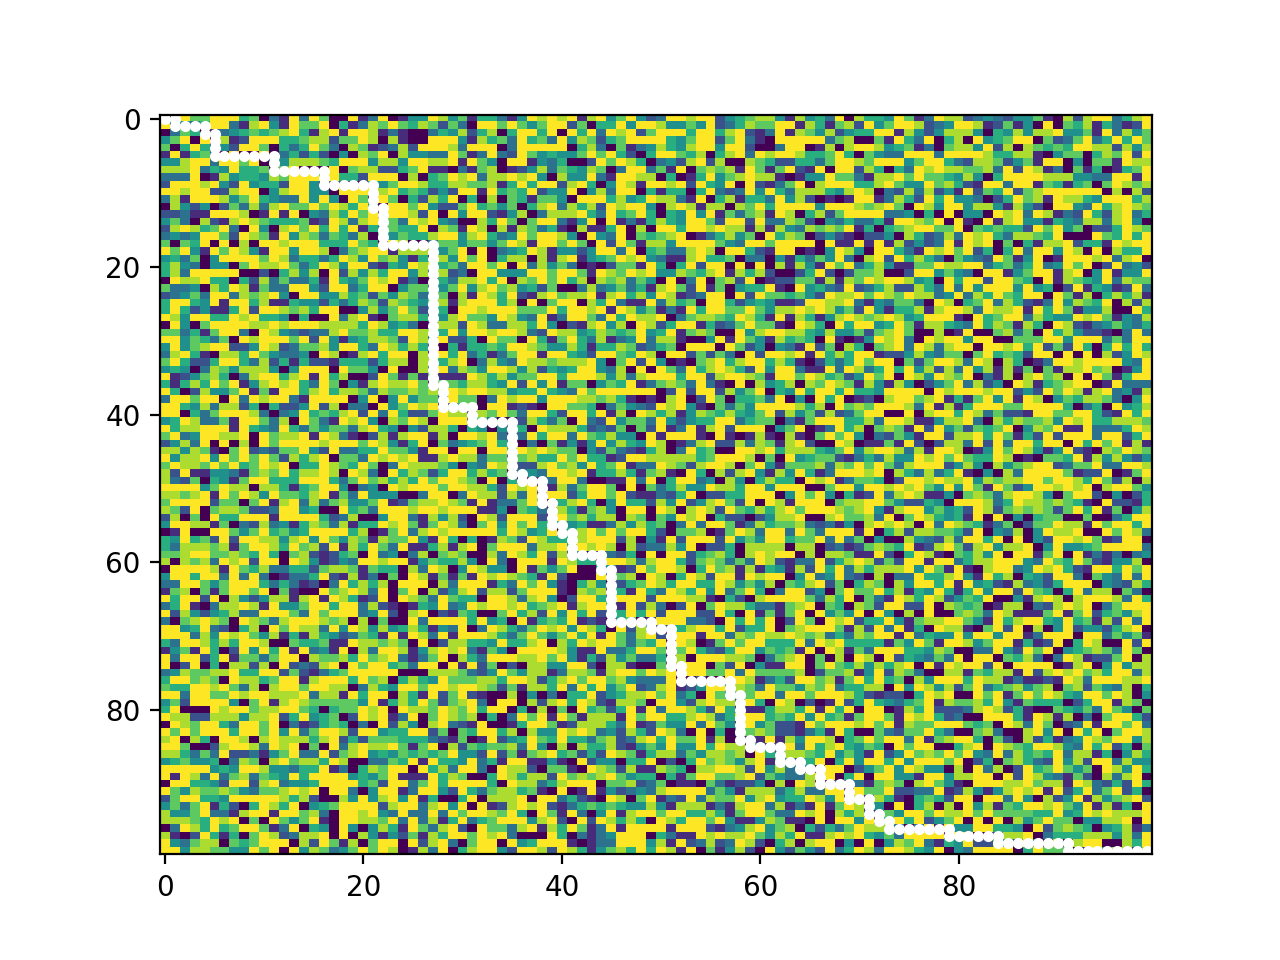

1 paths 10437 pushes.
	Dict cost 741, calc 741
CPU times: user 513 ms, sys: 42.5 ms, total: 556 ms
Wall time: 524 ms


In [153]:

%%time
%matplotlib notebook
if True:
    with open('p15a_input.txt', 'r') as fid:
        data_in = fid.read().strip().split('\n')
else:
    data_in =  ['1163751742',
                '1381373672',
                '2136511328',
                '3694931569',
                '7463417111',
                '1319128137',
                '1359912421',
                '3125421639',
                '1293138521',
                '2311944581']

n = len(data_in)
m = len(data_in[0])

cpth = np.zeros((n,m), dtype='int')
for pln, ln in enumerate(data_in):
    for plm, l in enumerate(ln):
        cpth[pln, plm] = int(l)

print(cpth.shape)

    
def vitpath(cost_map, pst=np.array([0,0], dtype='int'), 
            pnd=np.array([-1,-1], dtype='int'), maxpaths=2**14):
    nxtpst = np.array([[0,1],[1,0],[0,-1],[-1,0]], dtype='int')
    n,m = cost_map.shape
    mrks = ['w.', 'bx', 'r+', 'b.']
    if pnd[0] < 0:
        pnd[0] = n-1
        pnd[1] = m-1
    paths=[]
    ct = 0
    heapq.heappush(paths, 
                   (0, ct, {'pts':np.atleast_2d(pst), 'cost':0, 'heur':np.sum(np.abs(pst-pnd)), 'done':False}))
    ct+=1
    high = np.sum(cost_map)
    print(high)
    
    heapq.heappush(paths, 
                   (high, ct, {'pts':np.atleast_2d(pst), 'cost':0, 'heur':np.sum(np.abs(pst-pnd)), 'done':False}))
    ct+=1
    print(paths)
    best_map = high*np.ones((n,m), dtype='int')
    path_map = -1*np.ones((n,m), dtype='int')
    
    best_map[pst[0], pst[1]] = 0
    path_map[pst[0], pst[1]] = 0
    conter = 0
    maxit = 1e7
    while True:
        conter += 1
        if conter == maxit:
            break
        ncb, _, pth = heapq.heappop(paths)
        
        if len(paths) == 0:
            print(pth)
        
        if not pth['done']:
            #build the four new points
            first = True
            for ii in range(4):
                ph = pth['pts'][-1,:]+nxtpst[ii,:]
                if 0<=ph[0]<n and 0<=ph[1]<m:
                    
                    nc = pth['cost'] + cost_map[ph[0], ph[1]]
                    nh = np.sum(np.abs(ph-pnd))
                    if nc < best_map[ph[0], ph[1]]:
                        if best_map[ph[0], ph[1]] < high:
                            if False:
                                for ip in range(len(paths)):
                                    ipth = len(paths)-1-ip
                                    pen = np.sum(np.abs(paths[ipth]['pts'] - np.atleast_2d(ph)), axis=1)
                                    if pen.min() == 0 and not paths[ipth]['done']:
                                        #print('removing path {}'.format(ipth))
                                        #print('contains {} was {} now {}'.format(ph, best_map[ph[0], ph[1]], nc))
                                        #print(paths[ipth])
                                        #print
                                        del paths[ipth]
                        best_map[ph[0], ph[1]] = nc
                        #add this one
                        first = False
                        if ph[0]==pnd[0] and ph[1]==pnd[1]:
                            heapq.heappush(paths, (nc+nh, ct,
                                            {'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                             'cost':nc, 'heur':0, 'done':True}))
                            ct += 1
                            print('path complete {} '.format(nc))
                        else:
                            #print('Pushing the path')
                            #print(paths)
                            #print(nc,nh)
                            #print({'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                            #                 'cost':nc, 'heur':0, 'done':False})
                            heapq.heappush(paths, (nc+nh, ct,
                                            {'pts':np.concatenate([pth['pts'], np.atleast_2d(ph)], axis=0),
                                             'cost':nc, 'heur':nh, 'done':False}))
                            ct += 1
            #if first:
            #    print('nothing put away')
        else:
            complete = True
            heapq.heappush(paths, (ncb, ct, pth))
            ct += 1
            break
        #print(conter)
        #print()
        
    _=plt.figure()
    _=plt.imshow(cost_map, aspect='auto')
    colorwheel = ['w', 'b', 'k', 'r', 'g']
    bestcost, its, bestpath = heapq.heappop(paths)
    css = -cost_map[0,0]
    for pos in bestpath['pts']:
        _=plt.plot(pos[1], pos[0], 'w.')
        css += cost_map[pos[0], pos[1]]
        
    print('{} paths {} pushes.\n\tDict cost {}, calc {}'.format(len(paths), its, bestpath['cost'], css))
    
    #_=plt.figure()
    #best_map[best_map == high] = -1
    #_=plt.imshow(best_map, aspect='auto')
    #_=plt.imshow(10*np.log10(1+best_map), aspect='auto')
    
    
    return bestpath
                                
                                
                            

bp1 = vitpath(cpth, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))

In [ ]:
%%time
cpfull = np.zeros((500,500), dtype='int')
cpp = np.zeros((100,100,9), dtype='int')
cpp[:,:,0] = cpth
#print(np.sum(cpp))
for ii in range(1,9):
    cpp[:,:,ii] = cpp[:,:,ii-1]%9+1

cpfull[:100,:][:,:100] = cpp[:,:,0]
cpfull[:100,:][:,100:200] = cpp[:,:,1]
cpfull[:100,:][:,200:300] = cpp[:,:,2]
cpfull[:100,:][:,300:400] = cpp[:,:,3]
cpfull[:100,:][:,400:500] = cpp[:,:,4]

cpfull[100:200,:][:,:100] = cpp[:,:,1]
cpfull[100:200,:][:,100:200] = cpp[:,:,2]
cpfull[100:200,:][:,200:300] = cpp[:,:,3]
cpfull[100:200,:][:,300:400] = cpp[:,:,4]
cpfull[100:200,:][:,400:500] = cpp[:,:,5]

cpfull[200:300,:][:,:100] = cpp[:,:,2]
cpfull[200:300,:][:,100:200] = cpp[:,:,3]
cpfull[200:300,:][:,200:300] = cpp[:,:,4]
cpfull[200:300,:][:,300:400] = cpp[:,:,5]
cpfull[200:300,:][:,400:500] = cpp[:,:,6]

cpfull[300:400,:][:,:100] = cpp[:,:,3]
cpfull[300:400,:][:,100:200] = cpp[:,:,4]
cpfull[300:400,:][:,200:300] = cpp[:,:,5]
cpfull[300:400,:][:,300:400] = cpp[:,:,6]
cpfull[300:400,:][:,400:500] = cpp[:,:,7]

cpfull[400:500,:][:,:100] = cpp[:,:,4]
cpfull[400:500,:][:,100:200] = cpp[:,:,5]
cpfull[400:500,:][:,200:300] = cpp[:,:,6]
cpfull[400:500,:][:,300:400] = cpp[:,:,7]
cpfull[400:500,:][:,400:500] = cpp[:,:,8]

#print(cpfull.shape)
#print(np.sum(cpfull))

bp2 = vitpath(cpfull, pst=np.array([0,0], dtype='int'), pnd=np.array([-1,-1], dtype='int'))


1184856
[(0, 0, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 998, 'done': False}), (1184856, 1, {'pts': array([[0, 0]]), 'cost': 0, 'heur': 998, 'done': False})]


# Problem 16

In [119]:
if True:
    with open('p16a_input.txt', 'r') as fid:
        data_in = fid.read().strip()
else:
    data_in = ['D2FE28',
               '38006F45291200',
               'EE00D40C823060',
               '8A004A801A8002F478',
               '620080001611562C8802118E34',
               'C0015000016115A2E0802F182340',
               'A0016C880162017C3686B18A3D4780',
               'C200B40A82',
               '04005AC33890',
               '880086C3E88112',
               '9C0141080250320F1802104A08'][-1]
            
    
print(len(data_in))
dec_in = int(data_in, base=16)
dec1 = int(data_in[0], base=16)

bt = '{}'.format(bin(dec_in))[2:]

zpd = 4*len(data_in) - len(bt)

if zpd>0:
    bt = '0'*zpd + bt
print(len(bt))

#now parse it
pt = 0

def get_packet(btin):
    
    if len(btin)<11:
        return {'type':'empty', 'level':0, 'pv':-1, 'pid':-1, 'mesg':btin}, btin
    
    pv = int(btin[:3], base=2)
    pid = int(btin[3:6], base=2)
    
    
    # PID rules:
    #    4 is literal read in 5 bit nibblets
    #    not 4 is an operator
    #    tli is the next bit
    # tli rules:
    #    0 :: 15 bits indicate the length in bits
    #    1 :: 11 bits indicate the length in subpackets
    
    if pid == 4:
        pt = 6
        mesg = ''
        while True:
            bt0 = btin[pt]
            mesg = mesg+btin[pt+1:pt+5]
            pt += 5
            if bt0 == '0':
                break
        #print(mesg)
        msgo = {'type':'literal', 'level':0, 'pv':pv, 'pid':pid, 'mesg':mesg}
        #print('<<<')
        #print(msgo)
        #print('<<<')
        return msgo, btin[pt:]
    else:
        pt = 6
        tli = btin[pt]
        if tli == '0':
            length_ind = int(btin[pt+1:pt+16], base=2)
            pt += 16
            btsub = btin[pt:pt+length_ind]
            pt += length_ind
            btl = btin[pt:]
            msgo = [{'type':'ops15', 'level':0, 'pv':pv, 'pid':pid, 'mesg':'', 'length':length_ind, 'packet':btsub}]
            #print('***')
            #print(msgo)
            #print('***')
            while len(btsub)>10:
                msgn, btsub = get_packet(btsub)
                if type(msgn) is list:
                    for ms in msgn:
                        ms['level'] += 1
                        msgo.append(ms)
                else:
                    msgn['level'] += 1
                    msgo.append(msgn)

            if len(btsub):
                print(msgo)
                print('Unexpected leftover {} left of a {} length packet'.format(len(btsub), length_ind))
                print(msgn)
                
            
            return msgo, btl
            
        else:
            length_ind = int(btin[pt+1:pt+12], base=2)
            pt += 12
            btsub = btin[pt:]
            msgo = [{'type':'ops11', 'level':0, 'pv':pv, 'pid':pid, 'mesg':'', 'packet':btsub, 'num_packets':length_ind}]
            #print('!!!')
            #print(msgo)
            #print('!!!')
            for ipkt in range(length_ind):
                #print('packet {} of {}'.format(ipkt, length_ind))
                msgn, btsub = get_packet(btsub)
                # msgn['pkt_num'] = ipkt
                if type(msgn) is list:
                    for ms in msgn:
                        ms['level'] += 1
                        msgo.append(ms)
                else:
                    msgn['level'] += 1
                    msgo.append(msgn)
            #print('-'*40)
            #for ms in msgo:
            #    print('\t\t{}'.format(ms))
            #    print('...')
            #print('-'*40)
            return msgo, btsub
#
versum = 0
bts = bt+''


mesgs = []
while len(bts)>10:
    print('(re)entering')
    msg, bts = get_packet(bts)
    if type(msg) is list:
        for ms in msg:
            mesgs.append(ms)
    else:
        mesgs.append(msg)

for ms in mesgs:
    versum += ms['pv']
print('\n\nSum of versions {}'.format(versum))

imsg = 0
state = -1
ops = []
while imsg<len(mesgs):
    ms = mesgs[imsg]
    #print(ms)
    if ms['pid'] == 0:
        ops.append({'op':'sum', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 1:
        ops.append({'op':'prod', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 2:
        ops.append({'op':'min', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 3:
        ops.append({'op':'max', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 4:
        ops.append({'op':'val', 'level':ms['level'], 'vals':[int(ms['mesg'], base=2)]})
    elif ms['pid'] == 5:
        ops.append({'op':'gt', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 6:
        ops.append({'op':'lt', 'level':ms['level'], 'vals':[]})
    elif ms['pid'] == 7:
        ops.append({'op':'eq', 'level':ms['level'], 'vals':[]})
    
    imsg+=1

import numpy as np

for ms in mesgs:
    if ms['level']>=0:
        print(' '*ms['level'], end='')
        for ky in ms.keys():
            if ky != 'packet':
                print('{} :: {}  '.format(ky, ms[ky]), end = '')
        print()


for op in ops:
    if op['level']>=0:
        print(' '*op['level'], end='')
        print(op)   
print('='*50)
no = len(ops)
evlevel = 10000000
while evlevel > 0:
    evl = np.array([o['level'] for o in ops])
    evlevel = evl.max()
    print('Level {}'.format(evlevel))
    for ii in range(no):
        io = no-1-ii
        if ops[io]['level'] == evlevel:
            if ops[io]['op'] == 'val':
                if len(ops[io]['vals']) == 1:
                    ev = ops[io]['vals'][0]
                else:
                    print('Value oops')
            elif ops[io]['op'] == 'sum':
                ev = sum(ops[io]['vals'])
            elif ops[io]['op'] == 'prod':
                ev = np.prod(np.array(ops[io]['vals']))
            elif ops[io]['op'] == 'min':
                ev = np.array(ops[io]['vals']).min()
            elif ops[io]['op'] == 'max':
                ev = np.array(ops[io]['vals']).max()
            elif ops[io]['op'] == 'gt':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0]>ops[io]['vals'][1])
                else:
                    print('> error')
            elif ops[io]['op'] == 'lt':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0]<ops[io]['vals'][1])
                else:
                    print('< error')
            elif ops[io]['op'] == 'eq':
                if len(ops[io]['vals']) == 2:
                    ev = int(ops[io]['vals'][0] == ops[io]['vals'][1])
                else:
                    print('= error')
                    
            if np.sum(evl[:io] == evlevel-1) > 0:
                idin = np.where(evl[:io] == evlevel-1)[0][-1]    
                ops[idin]['vals'].insert(0, ev)
            
            ops[io]['level'] = -1
    
    for op in ops:
        if op['level']>=0:
         print(' '*op['level'], end='')
         print(op)    
    print('='*50)
print('ans = {}'.format(ev))

    
    
    #print(ms)
    #if ms['type'] == 'literal':
    #    print('\tliteral: {}'.format((int(ms['mesg'], base=2))))
    #    print()



1336
5344
(re)entering


Sum of versions 893
type :: ops11  level :: 0  pv :: 0  pid :: 0  mesg ::   num_packets :: 53  
 type :: literal  level :: 1  pv :: 6  pid :: 4  mesg :: 1111001100010111  
 type :: ops11  level :: 1  pv :: 7  pid :: 1  mesg ::   num_packets :: 2  
  type :: ops11  level :: 2  pv :: 4  pid :: 7  mesg ::   num_packets :: 2  
   type :: ops11  level :: 3  pv :: 0  pid :: 0  mesg ::   num_packets :: 3  
    type :: literal  level :: 4  pv :: 3  pid :: 4  mesg :: 0101  
    type :: literal  level :: 4  pv :: 1  pid :: 4  mesg :: 1111  
    type :: literal  level :: 4  pv :: 0  pid :: 4  mesg :: 0011  
   type :: ops11  level :: 3  pv :: 4  pid :: 0  mesg ::   num_packets :: 3  
    type :: literal  level :: 4  pv :: 4  pid :: 4  mesg :: 1110  
    type :: literal  level :: 4  pv :: 7  pid :: 4  mesg :: 1111  
    type :: literal  level :: 4  pv :: 4  pid :: 4  mesg :: 0110  
  type :: literal  level :: 2  pv :: 4  pid :: 4  mesg :: 101010001100010011110111  
 type :

 {'op': 'val', 'level': 1, 'vals': [470]}
 {'op': 'max', 'level': 1, 'vals': []}
  {'op': 'prod', 'level': 2, 'vals': []}
   {'op': 'min', 'level': 3, 'vals': []}
    {'op': 'max', 'level': 4, 'vals': []}
     {'op': 'prod', 'level': 5, 'vals': []}
      {'op': 'prod', 'level': 6, 'vals': []}
       {'op': 'sum', 'level': 7, 'vals': []}
        {'op': 'max', 'level': 8, 'vals': []}
         {'op': 'min', 'level': 9, 'vals': []}
          {'op': 'min', 'level': 10, 'vals': []}
           {'op': 'max', 'level': 11, 'vals': []}
            {'op': 'max', 'level': 12, 'vals': []}
             {'op': 'prod', 'level': 13, 'vals': []}
              {'op': 'sum', 'level': 14, 'vals': []}
               {'op': 'min', 'level': 15, 'vals': []}
                {'op': 'max', 'level': 16, 'vals': []}
                 {'op': 'prod', 'level': 17, 'vals': []}
                  {'op': 'min', 'level': 18, 'vals': []}
                   {'op': 'max', 'level': 19, 'vals': []}
                    {'op': 'pro

    {'op': 'val', 'level': 4, 'vals': [4]}
   {'op': 'sum', 'level': 3, 'vals': []}
    {'op': 'val', 'level': 4, 'vals': [9]}
    {'op': 'val', 'level': 4, 'vals': [14]}
    {'op': 'val', 'level': 4, 'vals': [3]}
 {'op': 'val', 'level': 1, 'vals': [32956]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'gt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [191365059161]}
   {'op': 'val', 'level': 3, 'vals': [92]}
  {'op': 'val', 'level': 2, 'vals': [1392]}
 {'op': 'min', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [10495]}
  {'op': 'val', 'level': 2, 'vals': [193]}
  {'op': 'val', 'level': 2, 'vals': [3730]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'lt', 'level': 2, 'vals': []}
   {'op': 'sum', 'level': 3, 'vals': []}
    {'op': 'val', 'level': 4, 'vals': [8]}
    {'op': 'val', 'level': 4, 'vals': [13]}
    {'op': 'val', 'level': 4, 'vals': [7]}
   {'op': 'sum', 'level': 3, 'vals': []}
    {'op': 'val', 'level': 4, 'vals': [9]}
    {'op': 'val', 

  {'op': 'prod', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [13]}
   {'op': 'val', 'level': 3, 'vals': [15]}
   {'op': 'val', 'level': 3, 'vals': [2]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'lt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [16368768]}
   {'op': 'val', 'level': 3, 'vals': [84]}
  {'op': 'val', 'level': 2, 'vals': [8]}
 {'op': 'val', 'level': 1, 'vals': [3911]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [2291]}
  {'op': 'lt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [666111]}
   {'op': 'val', 'level': 3, 'vals': [666111]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [34]}
  {'op': 'val', 'level': 2, 'vals': [117]}
  {'op': 'val', 'level': 2, 'vals': [126]}
  {'op': 'val', 'level': 2, 'vals': [69]}
 {'op': 'sum', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [151]}
  {'op': 'val', 'level': 2, 'vals': [1]}
  {'op': 'val', 'level': 2

   {'op': 'val', 'level': 3, 'vals': [68]}
  {'op': 'val', 'level': 2, 'vals': [2307]}
 {'op': 'val', 'level': 1, 'vals': [9]}
 {'op': 'val', 'level': 1, 'vals': [14]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [119]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [4]}
  {'op': 'lt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [2]}
   {'op': 'val', 'level': 3, 'vals': [237]}
 {'op': 'min', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [15285809]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [34266]}
  {'op': 'gt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [77092]}
   {'op': 'val', 'level': 3, 'vals': [77092]}
 {'op': 'val', 'level': 1, 'vals': [11]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'gt', 'level': 2, 'vals': []}
   {'op': 'sum', 'level': 3, 'vals': []}
    {'op': 'val', 'level': 4, 'vals': [12]}
    {'op': 'val', 'level': 4, 'vals

    {'op': 'val', 'level': 4, 'vals': [4]}
    {'op': 'val', 'level': 4, 'vals': [8]}
    {'op': 'val', 'level': 4, 'vals': [11]}
   {'op': 'sum', 'level': 3, 'vals': []}
    {'op': 'val', 'level': 4, 'vals': [11]}
    {'op': 'val', 'level': 4, 'vals': [4]}
    {'op': 'val', 'level': 4, 'vals': [11]}
  {'op': 'val', 'level': 2, 'vals': [3671]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'eq', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [229]}
   {'op': 'val', 'level': 3, 'vals': [17]}
  {'op': 'val', 'level': 2, 'vals': [215]}
 {'op': 'max', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [272]}
  {'op': 'val', 'level': 2, 'vals': [20]}
  {'op': 'val', 'level': 2, 'vals': [83577913]}
  {'op': 'val', 'level': 2, 'vals': [347]}
  {'op': 'val', 'level': 2, 'vals': [1739]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'lt', 'level': 2, 'vals': []}
   {'op': 'val', 'level': 3, 'vals': [68]}
   {'op': 'val', 'level': 3, 'vals': [68]}
  {'op': 'val', 'leve

  {'op': 'val', 'level': 2, 'vals': [42393]}
 {'op': 'sum', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [58]}
  {'op': 'val', 'level': 2, 'vals': [133721]}
  {'op': 'val', 'level': 2, 'vals': [407]}
  {'op': 'val', 'level': 2, 'vals': [123]}
 {'op': 'max', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [102]}
  {'op': 'val', 'level': 2, 'vals': [4245376655368]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [1210908]}
  {'op': 'lt', 'level': 2, 'vals': [44621, 2355497225458]}
 {'op': 'max', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [518585]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'gt', 'level': 2, 'vals': [877192, 877192]}
  {'op': 'val', 'level': 2, 'vals': [40132854]}
 {'op': 'val', 'level': 1, 'vals': [35160]}
 {'op': 'min', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2, 'vals': [10]}
  {'op': 'val', 'level': 2, 'vals': [678]}
 {'op': 'prod', 'level': 1, 'vals': []}
  {'op': 'val', 'level': 2,

In [65]:
print(data_in[:2])
print(bt[:6])
print(bt[6])
print(bt[7:18])
print(int(bt[7:18], base=2))


02
000000
1
00000110101
53
